In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("data/yellow_tripdata_2025-01.parquet")


In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [4]:
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])


In [5]:
df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [6]:
df["duration"] = df["duration"].apply(lambda td : td.total_seconds()/60)

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,...,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0,8.350000
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,...,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0,2.550000
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,...,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0,1.950000
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,...,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0,5.566667
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,...,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0,3.533333


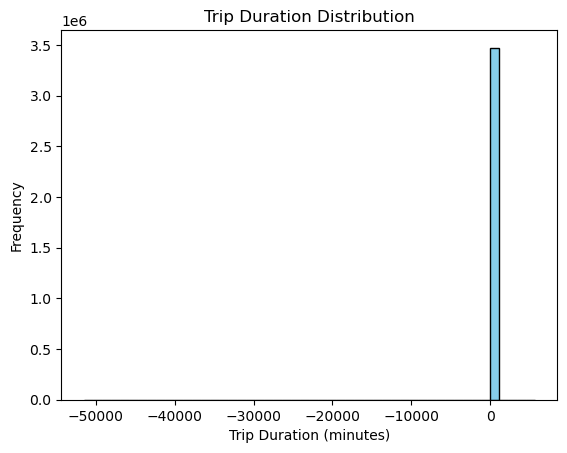

In [8]:
plt.hist(df["duration"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")
plt.show()

In [10]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06,3.475226e+06,3.475226e+06
mean,1.785428e+00,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.297859e+00,5.855126e+00,2.482535e+00,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01,4.834093e-01,1.501812e+01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01,-5.147232e+04
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00,0.000000e+00,7.283333e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00,7.500000e-01,1.170000e+01
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00,7.500000e-01,1.833333e+01
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00,7.500000e-01,5.626317e+03
std,4.263282e-01,NaN,NaN,7.507503e-01,5.646016e+02,1.163277e+01,6.452948e+01,6.940169e+01,7.013334e-01,4.634729e+02,1.861509e+00,1.374623e-01,3.779681e+00,2.002582e+00,2.781938e-01,4.636585e+02,9.039932e-01,4.725090e-01,3.619307e-01,3.871358e+01


In [12]:
df[(df['duration'] >=1) & (df['duration'] < 60)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,...,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.00,8.350000
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,...,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.00,2.550000
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,...,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.00,1.950000
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,...,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.00,5.566667
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,...,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.00,3.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475221,2,2025-01-31 23:01:48,2025-01-31 23:16:29,NaN,3.35,NaN,None,79,237,0,...,0.0,0.5,0.00,0.0,1.0,20.60,NaN,NaN,0.75,14.683333
3475222,2,2025-01-31 23:50:29,2025-02-01 00:17:27,NaN,8.73,NaN,None,161,116,0,...,0.0,0.5,0.00,0.0,1.0,32.89,NaN,NaN,0.75,26.966667
3475223,2,2025-01-31 23:26:59,2025-01-31 23:43:01,NaN,2.64,NaN,None,144,246,0,...,0.0,0.5,0.00,0.0,1.0,19.66,NaN,NaN,0.75,16.033333
3475224,2,2025-01-31 23:14:34,2025-01-31 23:34:52,NaN,3.16,NaN,None,142,107,0,...,0.0,0.5,0.00,0.0,1.0,22.30,NaN,NaN,0.75,20.300000
